In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [3]:
df = pd.read_csv('data/USvideos.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB
None


In [5]:
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


# Using our JSON metadata:

Every country has a different set of category IDs. This information is saved in the json file US_category_id.json. Let's use that metadata to add a column in our dataframe that tells us the category corresponding to the numeric id in category_id

In [54]:
category_id_file = open('data/US_category_id.json').read()
category_items = json.loads(category_id_file)['items']

## Let's look at the structure of our json information:

In [55]:
print(json.dumps(category_items, indent=4, sort_keys=True))

[
    {
        "etag": "\"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ\"",
        "id": "1",
        "kind": "youtube#videoCategory",
        "snippet": {
            "assignable": true,
            "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
            "title": "Film & Animation"
        }
    },
    {
        "etag": "\"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA\"",
        "id": "2",
        "kind": "youtube#videoCategory",
        "snippet": {
            "assignable": true,
            "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
            "title": "Autos & Vehicles"
        }
    },
    {
        "etag": "\"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg\"",
        "id": "10",
        "kind": "youtube#videoCategory",
        "snippet": {
            "assignable": true,
            "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
            "title": "Music"
        }
    },
    {
        "etag": "\"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI\"",

We'll create a dictionary that maps ID's to category names. Once that's done, we can create a lambda expression (concise way to express a function in Python) that returns the category name for a given ID. Dataframes have a feature called `df.apply` that lets us apply a function to a column in our dataframe. We can use this to create a new column in the data

In [56]:
id_to_category = {}
for item in category_items:
    v_id = item['id']
    category = item['snippet']['title']
    print(v_id, category)
    id_to_category[v_id] = category

1 Film & Animation
2 Autos & Vehicles
10 Music
15 Pets & Animals
17 Sports
18 Short Movies
19 Travel & Events
20 Gaming
21 Videoblogging
22 People & Blogs
23 Comedy
24 Entertainment
25 News & Politics
26 Howto & Style
27 Education
28 Science & Technology
29 Nonprofits & Activism
30 Movies
31 Anime/Animation
32 Action/Adventure
33 Classics
34 Comedy
35 Documentary
36 Drama
37 Family
38 Foreign
39 Horror
40 Sci-Fi/Fantasy
41 Thriller
42 Shorts
43 Shows
44 Trailers


In [57]:
get_category = lambda id: id_to_category[str(id)]
df['category'] = df['category_id'].apply(get_category)

In [58]:
df.to_csv('data/USvideos_proc.csv')

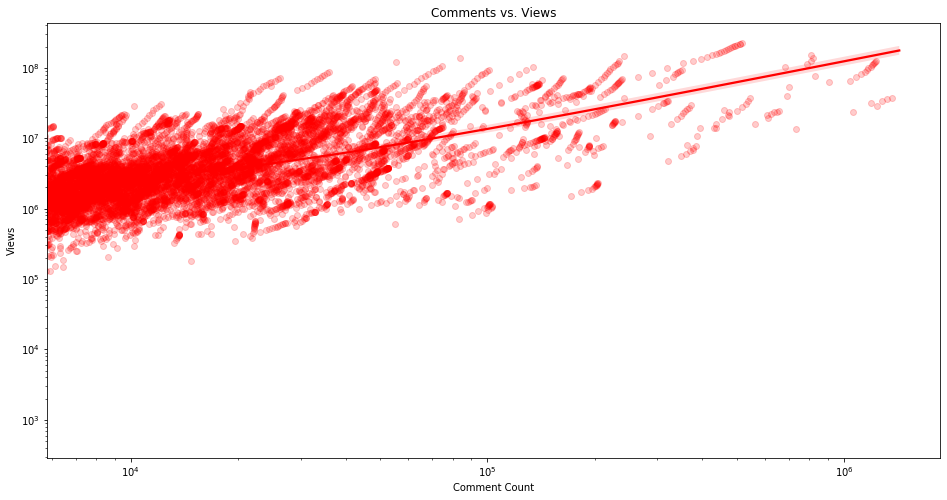

In [65]:
fig = plt.figure(figsize=(16,8))
sns.regplot('comment_count', 'views', color='red', scatter_kws={'alpha':0.2}, data=df)
plt.xlabel('Comment Count')
plt.ylabel('Views')
plt.title('Comments vs. Views')
plt.xscale('log')
plt.yscale('log')
plt.show()